# Color Detector - GRIP - Computer Vision and IOT - Task  2

## Author: Hritaban Ghosh

Note: The images used here are taken from https://unsplash.com/
and  https://www.peta.org/wp-content/uploads/2015/03/David-Williams-Man-with-Beard-Walking-Cat-e1426092041823.jpg
    
    

### Step 1: Import the Libraries

In [1]:
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter
import cv2

### Step 2: Read an Image

In [2]:
# Creating a function to read images and convert to RGB
# This is done because opencv by default reads an image as BGR
def read_n_get_image(file_path):
    image = cv2.imread(file_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

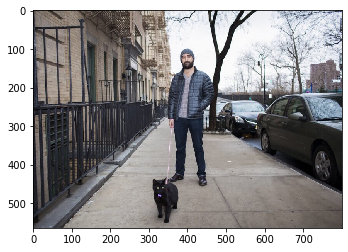

In [3]:
# Testing the read_n_get_image function
image = read_n_get_image("Man_With_Car.jpg")
plt.imshow(image)

### Step 3: Resize Image

In [4]:
# Resizing of image is done so that KMeans does not take too much time to return the prominent colors
image = cv2.resize(image, (500, 500))

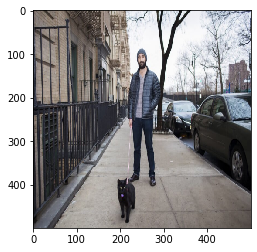

In [5]:
# Show the image after resizing
plt.imshow(image)

### Step 4: Creating the matrix of features for our K-Means Algorithm

In [6]:
print(type(image))
print(image)
print(image.shape)

<class 'numpy.ndarray'>
[[[ 46  48  57]
  [ 60  55  60]
  [100  90  87]
  ...
  [162 170 178]
  [171 181 183]
  [166 176 174]]

 [[ 47  49  58]
  [ 60  56  62]
  [101  91  90]
  ...
  [ 76  82 104]
  [ 94 100 122]
  [ 75  81 104]]

 [[ 48  49  60]
  [ 60  58  64]
  [102  93  92]
  ...
  [ 48  51  90]
  [ 65  68 114]
  [ 50  52 103]]

 ...

 [[ 66  65  70]
  [ 68  67  72]
  [ 72  71  76]
  ...
  [ 80  72  69]
  [ 79  71  68]
  [ 79  71  68]]

 [[ 67  66  71]
  [ 69  69  73]
  [ 73  72  77]
  ...
  [ 80  72  69]
  [ 79  71  68]
  [ 79  71  68]]

 [[ 68  67  72]
  [ 71  70  75]
  [ 74  73  78]
  ...
  [ 80  72  69]
  [ 79  71  68]
  [ 79  71  68]]]
(500, 500, 3)


In [7]:
# x is the matrix of features to be supplied to the KMeans Algorithm
x = image.reshape(image.shape[0]*image.shape[1],3)

In [8]:
print(x)

[[ 46  48  57]
 [ 60  55  60]
 [100  90  87]
 ...
 [ 80  72  69]
 [ 79  71  68]
 [ 79  71  68]]


### Step 5: Building the KMeans Clustering Model to find out the top five prominent colors in the model

In [9]:
kmeans = KMeans(n_clusters=5)

In [10]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
prominent_colors = kmeans.cluster_centers_
prominent_colors = prominent_colors.astype(int)
print(prominent_colors)

[[ 34  35  38]
 [170 167 164]
 [129 123 121]
 [230 233 238]
 [ 79  77  78]]


Text(0.5, 1.0, 'Prominent Colors')

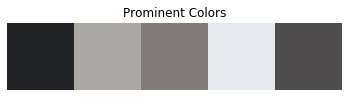

In [12]:
plt.imshow([prominent_colors])
plt.axis('off')
plt.title("Prominent Colors")

### Step 6: Get the ordering of prominency among the colors

In [13]:
# Get the number of pixels participating in each cluster
intensity_list = Counter(kmeans.labels_)
print(intensity_list)

Counter({0: 61208, 1: 60604, 2: 52021, 4: 39136, 3: 37031})


In [14]:
keys = list(intensity_list.keys())
values = list(intensity_list.values())
print(keys)
print(values)

[0, 4, 2, 1, 3]
[61208, 39136, 52021, 60604, 37031]


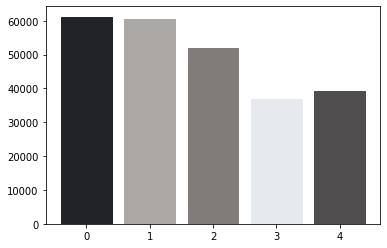

In [15]:
# Show the prominency levels on a bar graph
bar_graph = plt.bar(keys,values)
for x in range(0, len(prominent_colors)):
    bar_graph[x].set_color(prominent_colors[keys[x]].astype(float)/255.0)
plt.show(bar_graph)

### Step 7: Go through a list of images and display them

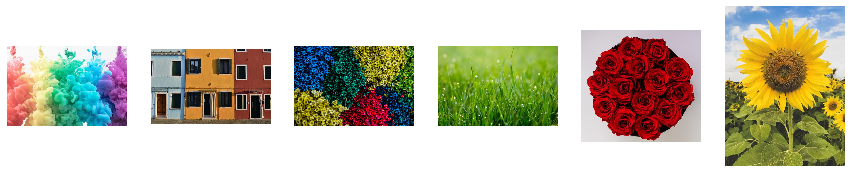

In [16]:
# Get the file names
filenames = os.listdir('Photos')

# Create an empty list for the list of photos
photos = []

# Populate the list of photos
for x in filenames:
    photos.append(read_n_get_image('Photos/'+x))

# create figure
fig = plt.figure(figsize=(15, 15))
    
# Add subplot and display image
columns = len(photos)
i = 1
for x in photos:
    fig.add_subplot(1, columns, i)
    plt.axis('off')
    plt.imshow(x)
    i += 1

### Step 8: Create a function that does all the processing of the image and returns its prominent colors

In [17]:
def get_prominent_colors(image):
    image = cv2.resize(image, (500, 500))
    x = image.reshape(image.shape[0]*image.shape[1],3)
    kmeans = KMeans(n_clusters=5)
    kmeans.fit(x)
    prominent_colors = kmeans.cluster_centers_
    prominent_colors = prominent_colors.astype(int)
    intensity_list = Counter(kmeans.labels_)
    keys = list(intensity_list.keys())
    values = list(intensity_list.values())
    bar_graph = plt.bar(keys,values)
    for x in range(0, len(prominent_colors)):
        bar_graph[x].set_color(prominent_colors[keys[x]].astype(float)/255.0)
    return bar_graph

### Step 9: Display image and their prominent colors

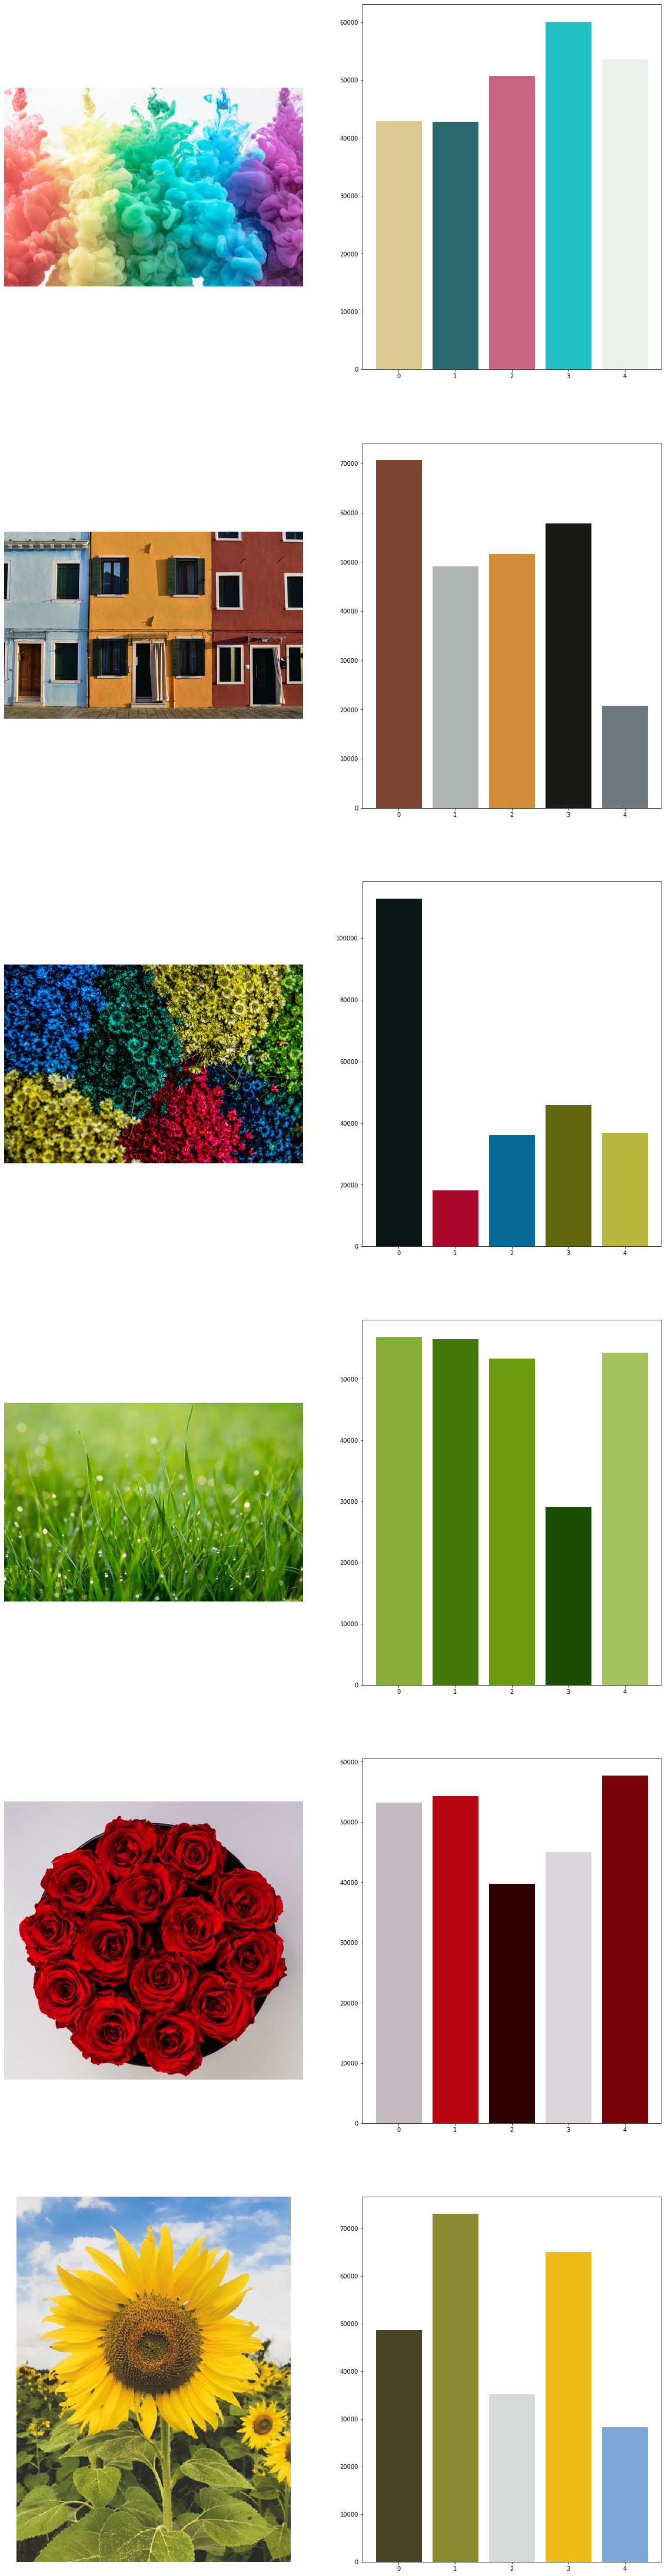

In [18]:
warnings.filterwarnings('ignore')

# create figure
fig = plt.figure(figsize=(20, 80))
    
# Add subplot and display image
rows = len(photos)
i = 1
for x in photos:
    fig.add_subplot(rows, 2, i)
    plt.axis('off')
    plt.imshow(x)
    i += 2
    
# Add subplot and display bar chart
i = 2
for x in photos:    
    fig.add_subplot(rows, 2, i)
    bar_graph = get_prominent_colors(x)
    fig.show(bar_graph)
    i += 2
    